# Computational Drug Discovery Project - Ligand Based Drug Design [Part6] Comparison of ML Models

Perform comparing several ML algorithms

We uesd voting regression to compare three types of regression models

-------------------------------------------------------------------------------------------------------------------

## Voting Regression

Voting regressor is an ensemble machine learning algorithm. For regression, a voting ensemble involves making a prediction that is the average of multiple other regression models. This method often reduces overfit and creates a smoother regression model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
df = pd.read_csv('PPARa_fp_morgan.csv')
df

,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit2038,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047
0,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1671,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
X = df.drop('smiles', axis=1)
X

,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,bit9,...,bit2038,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1670,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1671,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
df2 = pd.read_csv('ppara_bioactivity_data_ro5.csv')
df2

,Unnamed: 0,molecule_chembl_id,canonical_smiles,type,pChEMBL,MW,LogP,NumHDonors,NumHAcceptors,#RO5 Violations
0,0,CHEMBL15594,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,['IC50'],5.920819,304.474,6.21670,1.0,1.0,1.0
1,1,CHEMBL167430,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,['pEC50' 'EC50'],5.619930,482.374,5.66820,1.0,4.0,1.0
2,2,CHEMBL192518,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,['EC50' 'pEC50'],6.300686,310.271,3.78010,1.0,2.0,0.0
3,3,CHEMBL1934484,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,['EC50'],8.221849,435.549,4.52394,2.0,5.0,0.0
4,4,CHEMBL212911,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,['IC50'],5.370896,460.570,6.04202,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1669,1669,CHEMBL5194126,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,EC50,5.318759,460.508,4.03690,2.0,7.0,0.0
1670,1670,CHEMBL5194570,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,EC50,5.142668,371.433,3.84810,2.0,4.0,0.0
1671,1671,CHEMBL5207420,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,EC50,5.040959,329.421,3.19150,2.0,3.0,0.0
1672,1672,CHEMBL5186824,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,EC50,5.000000,385.460,3.77190,2.0,4.0,0.0


In [5]:
Y = df2.pChEMBL
Y

0       5.920819
1       5.619930
2       6.300686
3       8.221849
4       5.370896
          ...   
1669    5.318759
1670    5.142668
1671    5.040959
1672    5.000000
1673    4.917215
Name: pChEMBL, Length: 1674, dtype: float64

In [6]:
# Building a model
# Train classifiers
reg1 = HistGradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = KNeighborsRegressor(n_neighbors=2)

reg1.fit(X, Y)
reg2.fit(X, Y)
reg3.fit(X, Y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, Y)

VotingRegressor(estimators=[('gb',
                             HistGradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', KNeighborsRegressor(n_neighbors=2))])

### The first 20 predictions of each regression

In [7]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

/var/folders/jv/rf9v6lk51tqg62hxzfwfjg1w0000gn/T/ipykernel_90481/3894063605.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


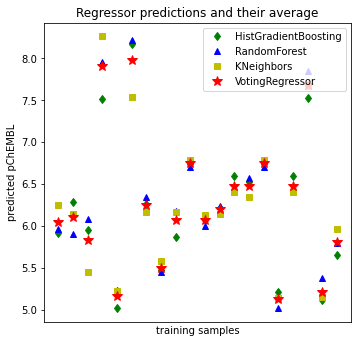

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5.5, 5.5))

plt.plot(pred1, "gd", label="HistGradientBoosting")
plt.plot(pred2, "b^", label="RandomForest")
plt.plot(pred3, "ys", label="KNeighbors")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted pChEMBL")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

fig.show()
fig.savefig('plot_morgan_voting_A.jpg')

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
ereg.fit(X_train, Y_train)

VotingRegressor(estimators=[('gb',
                             HistGradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', KNeighborsRegressor(n_neighbors=2))])

In [10]:
X_pred = ereg.predict(X_train)
R2= r2_score(Y_train, X_pred)
R2 

0.9111146587174255

In [11]:
RMSE=mean_squared_error(Y_train, X_pred)
RMSE

0.14867722977691458

In [12]:
# External set
pred = ereg.predict(X_test)
Q2 = r2_score(Y_test, pred)
Q2

0.6799946081609227

In [13]:
RMSE2=mean_squared_error(Y_test, pred)
RMSE2

0.5043437393802532

/Users/jen-tzu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jen-tzu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jen-tzu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jen-tzu/opt/anaco

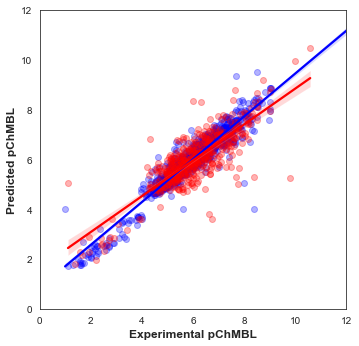

In [14]:
# Experimental vs Predicted pChEMBL Values
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as py 
import statsmodels.api as sm


sns.set_style("white")

ax = sns.regplot(Y_train, X_pred, scatter_kws={'alpha':0.3},color="blue")
ax = sns.regplot(Y_test, pred, scatter_kws={'alpha':0.3},color="red")
ax.set_xlabel('Experimental pChMBL', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pChMBL', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

ax.figure.set_size_inches(5.5, 5.5)
plt.show
plt.savefig('plot_voting_pchembl_A.jpg')